In [ ]:
# Importing necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from tabulate import tabulate
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder
import warnings
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

warnings.filterwarnings("ignore")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
#Loading dataset
df = pd.read_csv("/content/drive/MyDrive/loan_approval_dataset.csv")

In [ ]:
# Displaying basic information about the dataset
df.info()

In [ ]:
# Display basic statistics of numerical features
df.describe(include='all')

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
count,4269.000000,4269.000000,4269,4269,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03,4269
unique,NaN,NaN,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,Graduate,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Approved
freq,NaN,NaN,2144,2150,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2656
mean,2135.000000,2.498712,NaN,NaN,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06,NaN
std,1232.498479,1.695910,NaN,NaN,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06,NaN
min,1.000000,0.000000,NaN,NaN,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00,NaN
25%,1068.000000,1.000000,NaN,NaN,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06,NaN
50%,2135.000000,3.000000,NaN,NaN,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06,NaN
75%,3202.000000,4.000000,NaN,NaN,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06,NaN


In [ ]:
# Display the first few rows of the dataset
df.head(500)

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected
...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,496,2,Not Graduate,Yes,2400000,5400000,12,739,300000,2500000,5000000,3000000,Approved
496,497,5,Graduate,Yes,9800000,30300000,6,867,20800000,16000000,30200000,7600000,Approved
497,498,2,Not Graduate,No,8100000,24800000,6,307,200000,4000000,31100000,10500000,Rejected
498,499,3,Graduate,No,6700000,15500000,18,492,2100000,2000000,26300000,9400000,Rejected


In [ ]:
df.columns

In [ ]:
df.isnull().sum()
#There is no null value and duplicated value in this dataset.
#no_of_dependents, education, self_employed and loan_status are categorical columns.
#There are a total 4269 rows in this dataset, with 13 columns (features).
#There are 2656 data with an approved loan_status, which is about 62.2% compared to the "rejected" group.
#Other columns are numerical.

In [ ]:
# Cleaning and Checking the columns
df.columns = df.columns.str.replace(' ', '')
df.columns

DATA EXPLORATION

In [ ]:
#for linear seperability test
df_copy = df.copy()
columns_to_drop = ['loan_id', 'no_of_dependents', 'education', 'self_employed','loan_term']
df_copy.drop(columns=columns_to_drop, inplace=True)
numerical_features = df_copy.select_dtypes(include=['number'])

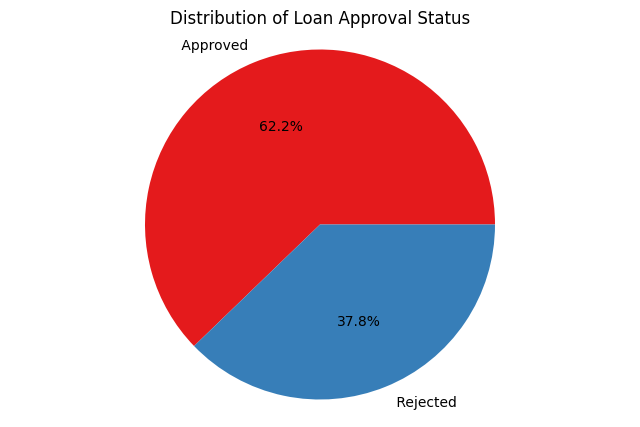

In [ ]:
#loan_status
loan_status_counts = df['loan_status'].value_counts()

# Ploting as a pie chart
plt.figure(figsize=(8, 5))
plt.pie(loan_status_counts, labels=loan_status_counts.index, autopct='%1.1f%%', colors=sns.color_palette('Set1'))
plt.title('Distribution of Loan Approval Status')
plt.axis('equal')
plt.show()

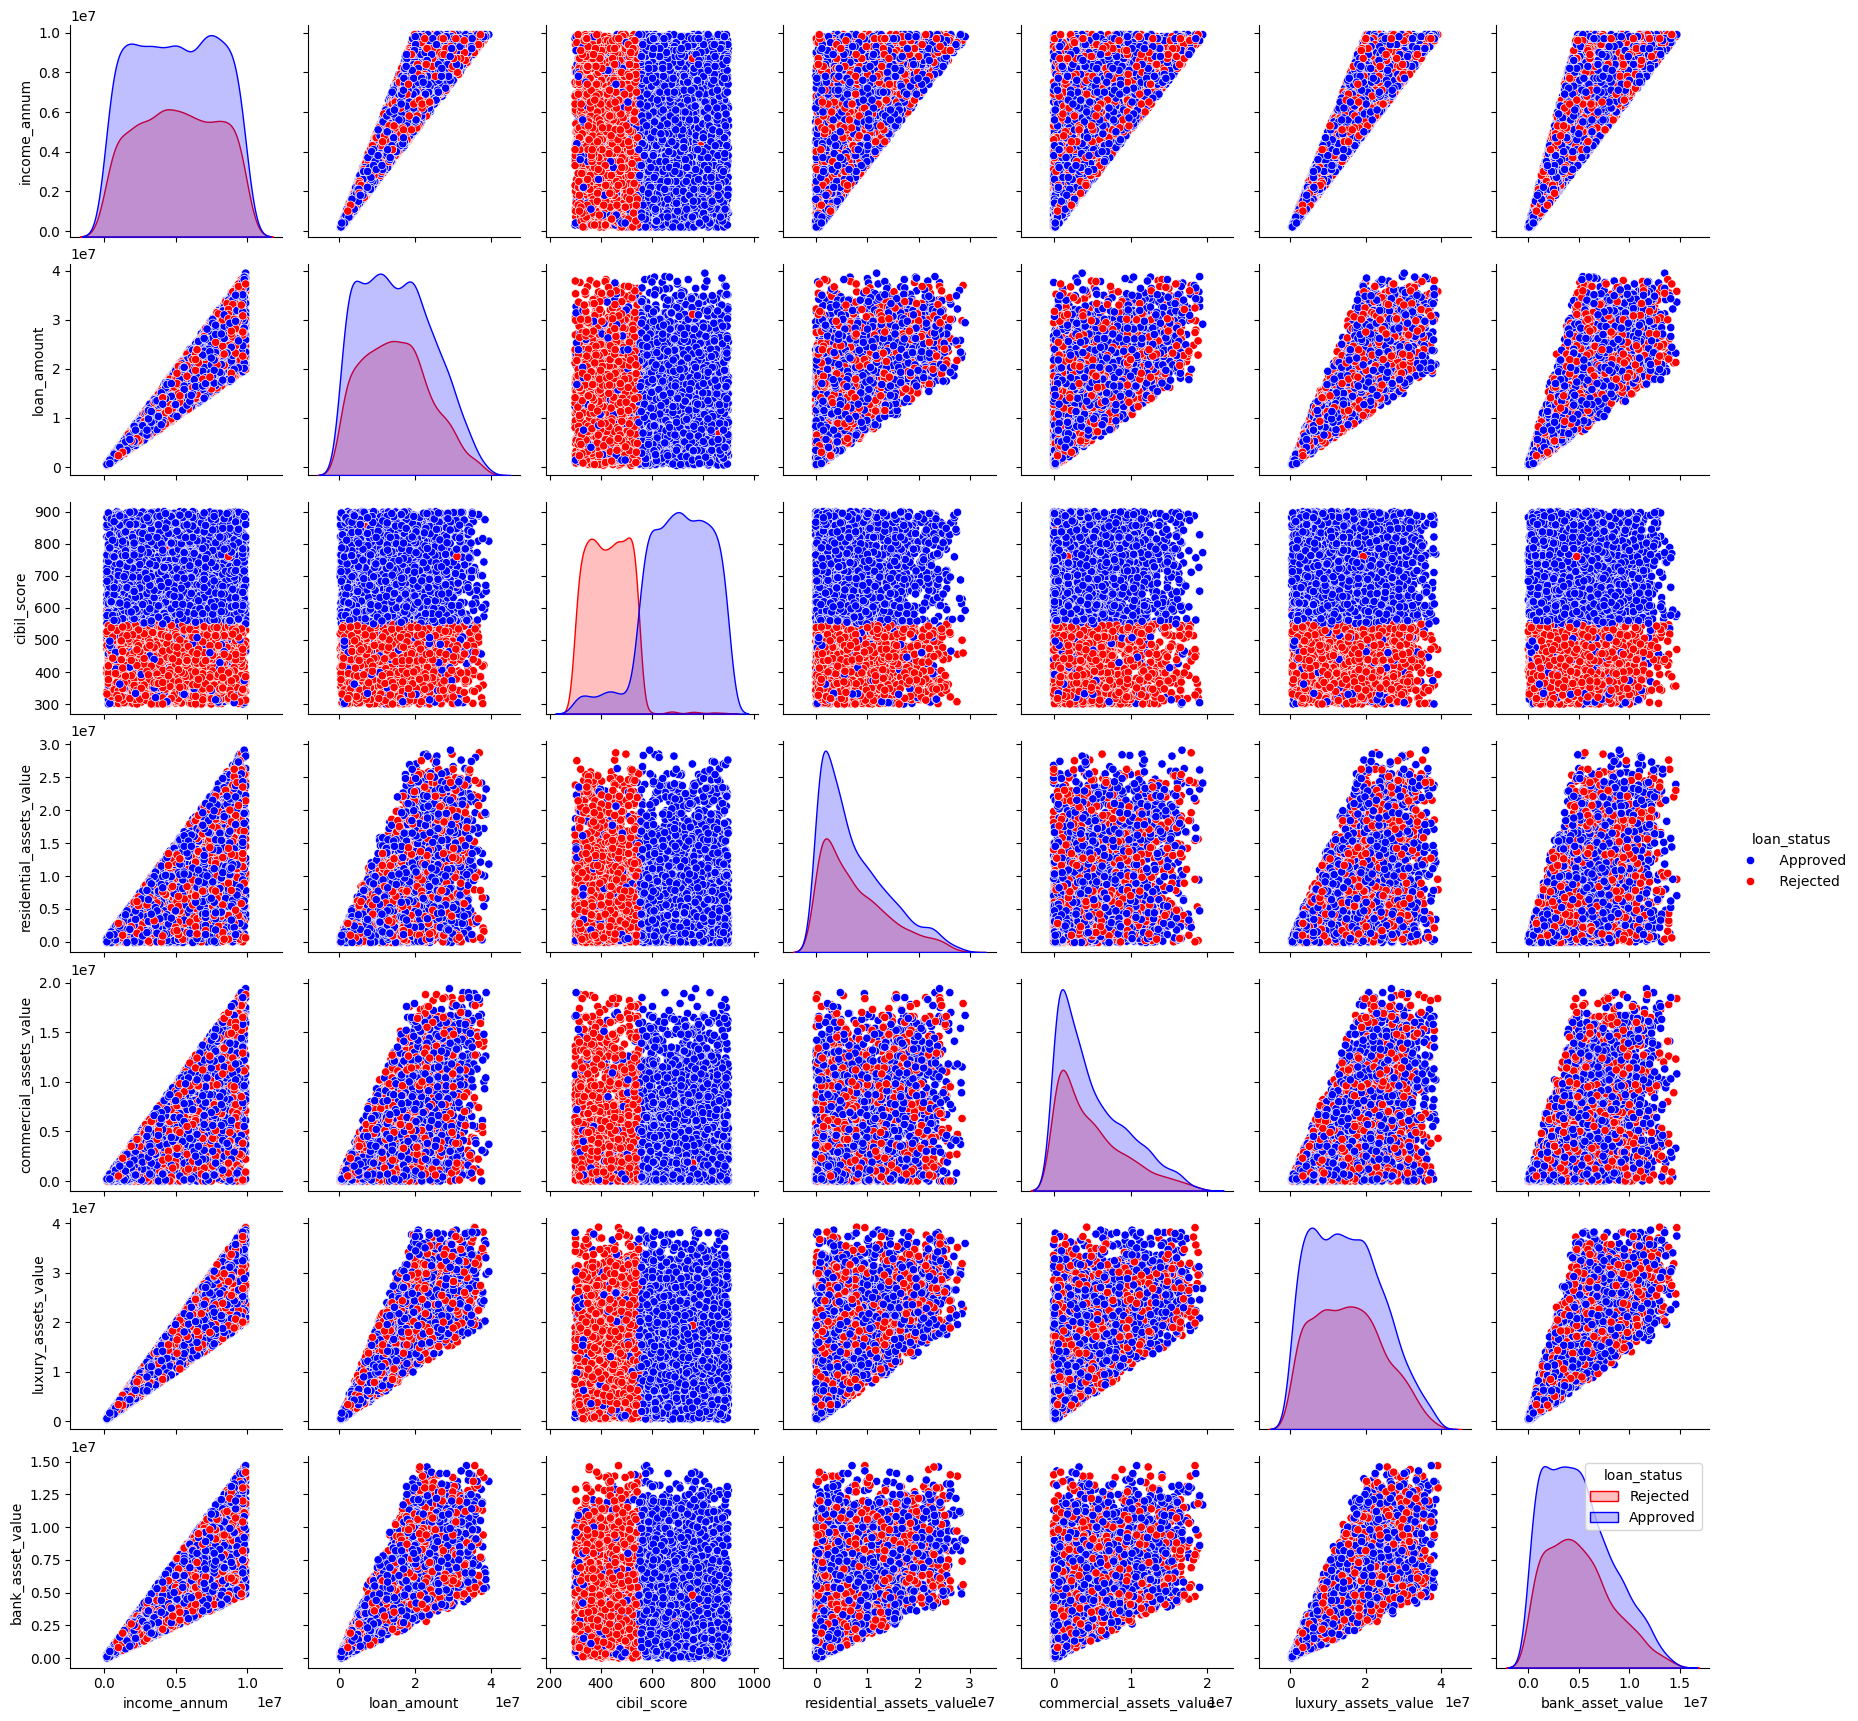

In [ ]:
# Using seaborn's pairplot to visualize relationships between numerical features
sns.pairplot(df_copy, hue='loan_status', palette=['blue','red'])

# Add a legend
plt.legend(title='loan_status', loc='upper right', labels=['Rejected', 'Approved'])
plt.show()

<Axes: >

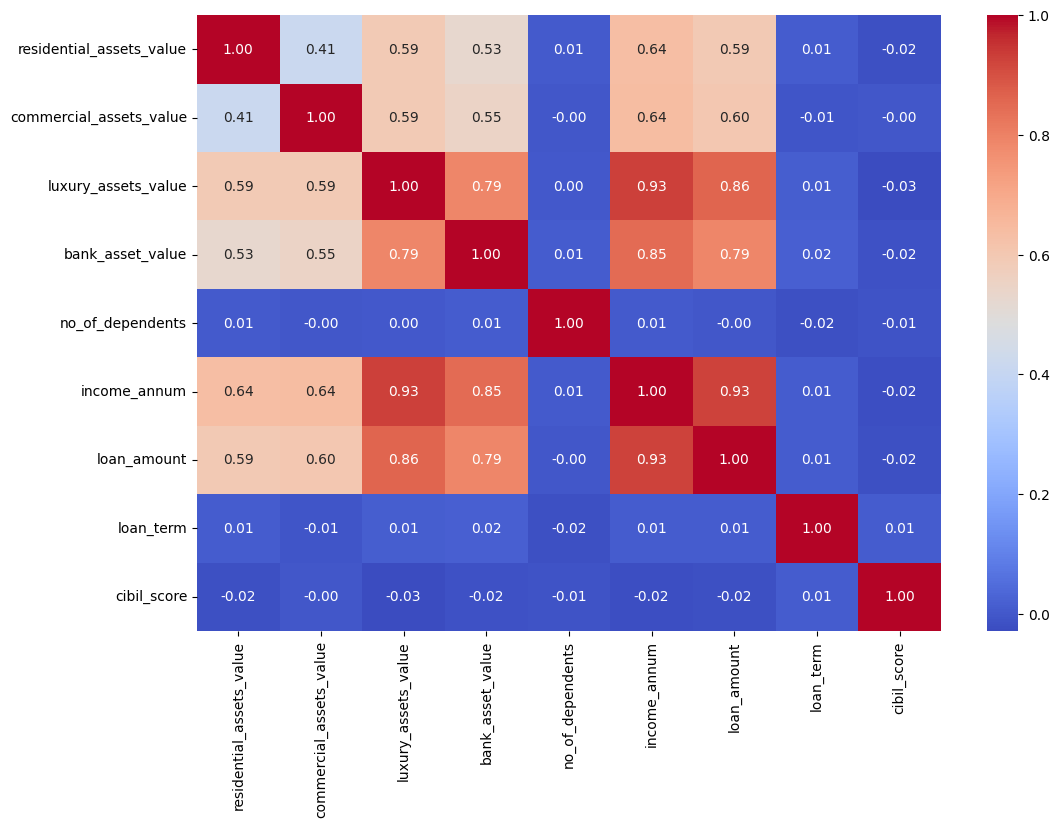

In [ ]:
# Extracting relevant columns for correlation analysis
loan_asset = df[['residential_assets_value', 'commercial_assets_value',
       'luxury_assets_value', 'bank_asset_value', 'no_of_dependents', 'education', 'self_employed',
       'income_annum', 'loan_amount', 'loan_term', 'cibil_score','loan_status']]
# Calculating correlation matrix
loan_asset_corr = loan_asset.corr()
# Creating a heatmap to visualize the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(loan_asset_corr, annot=True, fmt=".2f", cmap="coolwarm")

Over the heatmap above, it is shown that the variable that affects the loan_status the most is cibil_score.
It is also proved there is no variable that has a linear relationship with the education and self_employed.
There are strong linear relationship between income_annum & loan_amount, luxury_assets_value & income_annum, bank_asset_value & income_annum and luxury_assets_value & bank_asset_value


Feature Engineering

In [ ]:
# Creating dummy variables for categorical features in the 'loan' DataFrame
loan_dummies = pd.get_dummies(features)

# Renaming columns to have clearer names
loan_dummies.rename(columns={'education_ Graduate': 'education', 'self_employed_ Yes': 'self_employed', 'loan_status_ Approved': 'loan_status'}, inplace=True)

# Dropping unnecessary columns
loan_dummies = loan_dummies.drop(['education_ Not Graduate', 'self_employed_ No', 'loan_status_ Rejected'], axis=1)

# Displaying the resulting column names
loan_dummies.columns


Index(['no_of_dependents', 'income_annum', 'loan_amount', 'loan_term',
       'cibil_score', 'residential_assets_value', 'commercial_assets_value',
       'luxury_assets_value', 'bank_asset_value', 'education', 'self_employed',
       'loan_status'],
      dtype='object')

In [ ]:
# Encoding categorical variables
label_encoder = LabelEncoder()
df['education'] = label_encoder.fit_transform(df['education'])
df['self_employed'] = label_encoder.fit_transform(df['self_employed'])
df['loan_status'] = label_encoder.fit_transform(df['loan_status'])

# Separating features and target variable
X = df.drop('loan_status', axis=1)
y = df['loan_status']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Model Training and Evaluation:
1. Artificial Neural Network (ANN) Back Propagation:

In [ ]:
# Define the architecture of the MLP model with 2 hidden layers and 18 neurons per layer
dropout_rate=0.2
model = Sequential(name="BPNN")
model.add(Dense(12, activation='relu', input_shape=(X_train.shape[1],), name="HL1"))  # First hidden layer
model.add(Dense(6, activation='relu', name="HL2"))  # Second hidden layer
model.add(Dense(1, activation='sigmoid'))  # Output layer
model.compile(loss="binary_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])
model.summary()




Model: "BPNN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 HL1 (Dense)                 (None, 12)                156       
                                                                 
 HL2 (Dense)                 (None, 6)                 78        
                                                                 
 dense (Dense)               (None, 1)                 7         
                                                                 
Total params: 241 (964.00 Byte)
Trainable params: 241 (964.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


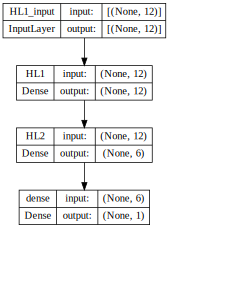

In [ ]:
from IPython.display import SVG
from tensorflow.keras.utils import model_to_dot
from tensorflow.keras.utils import plot_model

SVG(model_to_dot(model,show_shapes=True).create(prog="dot", format="svg"))

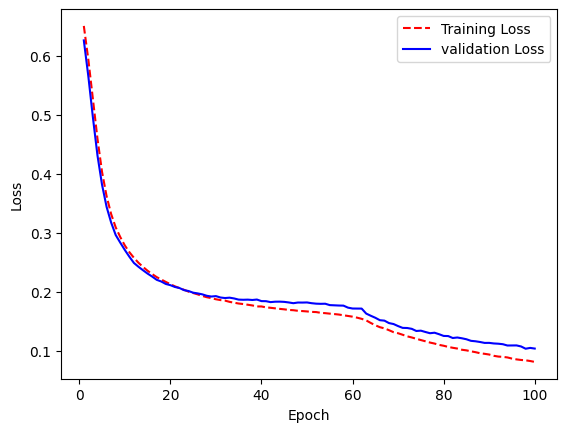

In [ ]:
history=model.fit(X_train,
                  y_train,
                  epochs=100,
                  verbose=0,
                  batch_size=42,
                  validation_data=(X_test,y_test))

training_loss=history.history["loss"]
validation_loss=history.history["val_loss"]

epoch_count=range(1, len(training_loss)+1)

plt.plot(epoch_count,training_loss, "r--")
plt.plot(epoch_count,validation_loss,"b-")
plt.legend(["Training Loss","validation Loss"])
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

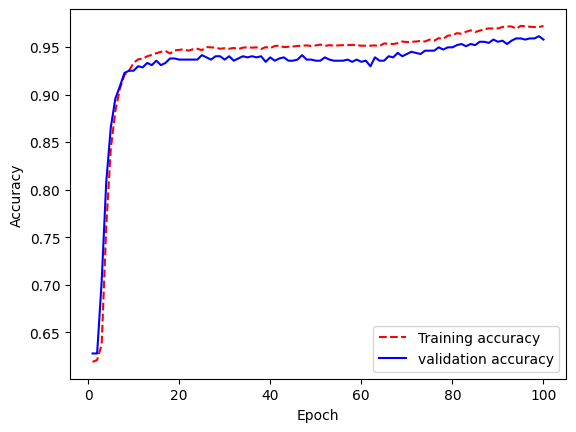

In [ ]:
training_accuracy=history.history["accuracy"]
validation_accuracy=history.history["val_accuracy"]

plt.plot(epoch_count,training_accuracy, "r--")
plt.plot(epoch_count,validation_accuracy,"b-")
plt.legend(["Training accuracy","validation accuracy"])
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.show()

Artificial Neural Network (ANN) with Feedforward and Back Propagation with Hyperparameter Tuning

In [ ]:

# Create an MLPClassifier
bpnn_model = MLPClassifier(random_state=42)

# Define the parameter grid with the updated neuron values for two hidden layers
param_grid = {
    'hidden_layer_sizes': [(12, 6)],
    'activation': ['logistic', 'tanh', 'relu'],
    'solver': ['lbfgs', 'adam']
}


# Perform grid search using GridSearchCV
grid_search_bpnn = GridSearchCV(estimator=bpnn_model, param_grid=param_grid, cv=3, scoring='accuracy')
grid_result_bpnn = grid_search_bpnn.fit(X_train, y_train)

# Summarize results
print("Best Accuracy: {:.4f} using {}".format(grid_result_bpnn.best_score_, grid_result_bpnn.best_params_))

best_bpnn_model = grid_search_bpnn.best_estimator_

Best Accuracy: 0.9798 using {'activation': 'logistic', 'hidden_layer_sizes': (12, 6), 'solver': 'lbfgs'}


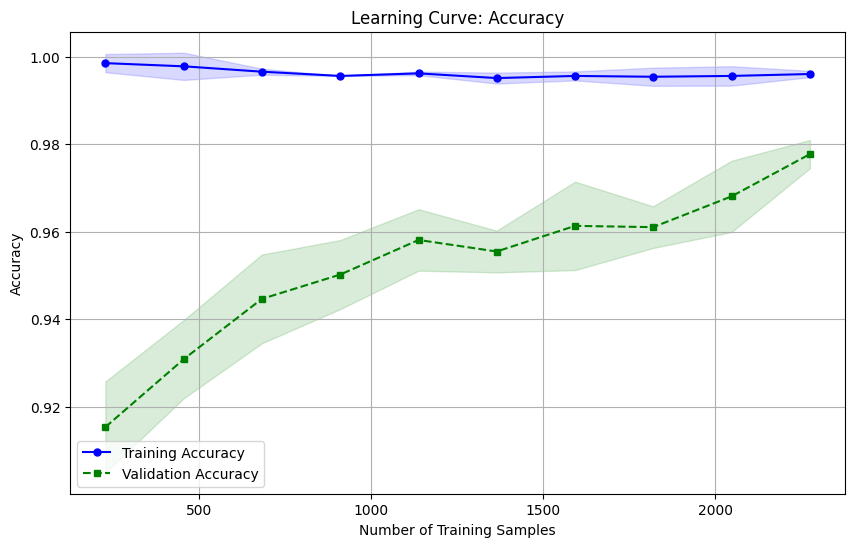

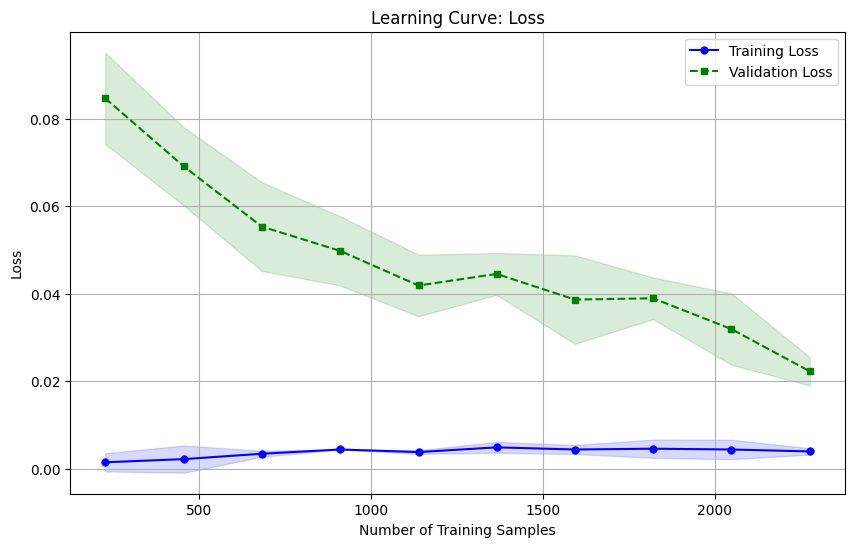

In [ ]:
from sklearn.model_selection import learning_curve

# Setting the parameters for learning curve
train_sizes, train_scores, test_scores = learning_curve(
    estimator=best_bpnn_model,
    X=X_train,
    y=y_train,
    train_sizes=np.linspace(0.1, 1.0, 10),
    cv=3,
    scoring='accuracy',
    n_jobs=-1
)

# Calculating mean and standard deviation for training and test scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Ploting the learning curve for accuracy
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training Accuracy')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean, color='green', linestyle='--', marker='s', markersize=5, label='Validation Accuracy')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
plt.xlabel('Number of Training Samples')
plt.ylabel('Accuracy')
plt.title('Learning Curve: Accuracy')
plt.legend()
plt.grid()
plt.show()

# Ploting the learning curve for loss
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, 1 - train_mean, color='blue', marker='o', markersize=5, label='Training Loss')
plt.fill_between(train_sizes, 1 - (train_mean + train_std), 1 - (train_mean - train_std), alpha=0.15, color='blue')
plt.plot(train_sizes, 1 - test_mean, color='green', linestyle='--', marker='s', markersize=5, label='Validation Loss')
plt.fill_between(train_sizes, 1 - (test_mean + test_std), 1 - (test_mean - test_std), alpha=0.15, color='green')
plt.xlabel('Number of Training Samples')
plt.ylabel('Loss')
plt.title('Learning Curve: Loss')
plt.legend()
plt.grid()
plt.show()

Model: "BPNN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 HL1 (Dense)                 (None, 50)                650       
                                                                 
 HL2 (Dense)                 (None, 25)                1275      
                                                                 
 dense_1 (Dense)             (None, 1)                 26        
                                                                 
Total params: 1951 (7.62 KB)
Trainable params: 1951 (7.62 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


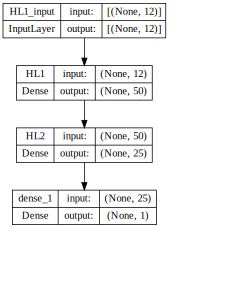

In [ ]:
# Define the architecture of the MLP model with 2 hidden layers and 18 neurons per layer
model2 = Sequential(name="BPNN")
model2.add(Dense(50, activation='relu', input_shape=(X_train.shape[1],), name="HL1"))  # First hidden layer
model2.add(Dense(25, activation='relu', name="HL2"))  # Second hidden layer
model2.add(Dense(1, activation='sigmoid'))  # Output layer
model2.compile(loss="binary_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])
model2.summary()
SVG(model_to_dot(model2,show_shapes=True).create(prog="dot", format="svg"))

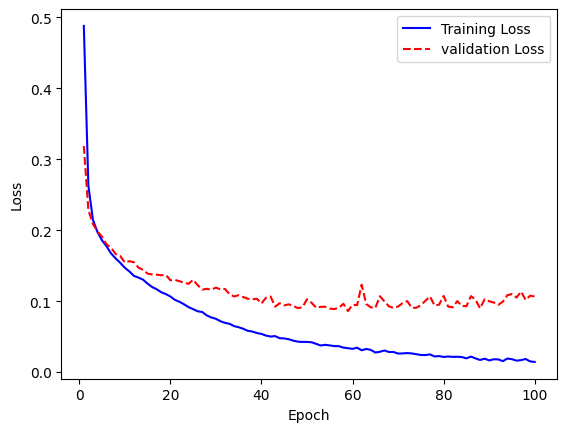

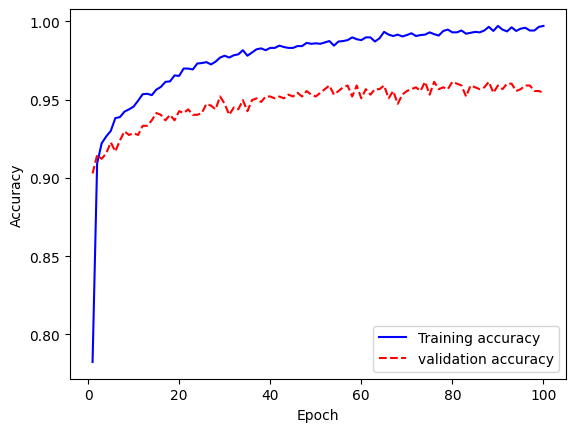

In [ ]:
history=model2.fit(X_train,
                  y_train,
                  epochs=100,
                  verbose=0,
                  batch_size=42,
                  validation_data=(X_test,y_test))

training_loss=history.history["loss"]
validation_loss=history.history["val_loss"]

epoch_count=range(1, len(training_loss)+1)

plt.plot(epoch_count,training_loss, "b-")
plt.plot(epoch_count,validation_loss,"r--")
plt.legend(["Training Loss","validation Loss"])
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

training_accuracy=history.history["accuracy"]
validation_accuracy=history.history["val_accuracy"]

plt.plot(epoch_count,training_accuracy, "b-")
plt.plot(epoch_count,validation_accuracy,"r--")
plt.legend(["Training accuracy","validation accuracy"])
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.show()

In [ ]:
# Hyperparameter Tuning for ANN
param_grid = {    'hidden_layer_sizes': [(50, 25)],
              'alpha': [0.0001, 0.001, 0.01],
              'max_iter': [200, 600, 800],
              'activation': ['logistic', 'tanh', 'relu'],
               'solver': ['lbfgs', 'adam']
}

ann_model = MLPClassifier(random_state=42)
grid_search_ann = GridSearchCV(estimator=ann_model, param_grid=param_grid, scoring='accuracy', cv=3)
grid_search_ann.fit(X_train, y_train)

# Printing the best hyperparameters
best_params_ann = grid_search_ann.best_params_
print(f"Best Hyperparameters for ANN: {best_params_ann}")

best_ann_model = grid_search_ann.best_estimator_


Best Hyperparameters for ANN: {'activation': 'logistic', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 25), 'max_iter': 800, 'solver': 'adam'}


### Ploting Learning Curve for the tuned model

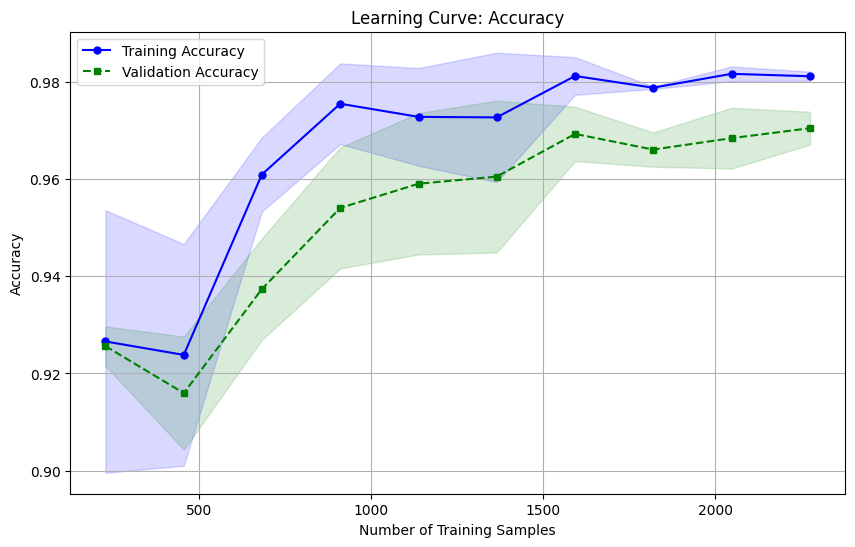

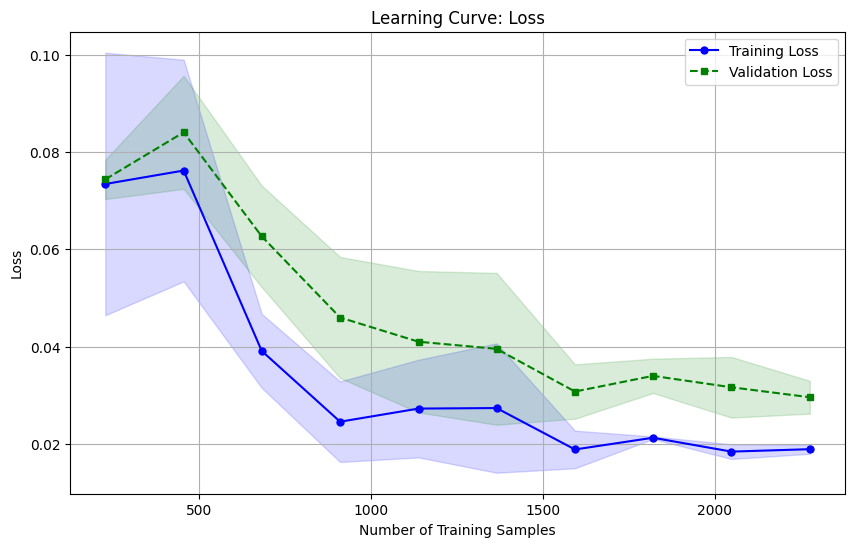

In [ ]:
from sklearn.model_selection import learning_curve

# Setting the parameters for learning curve
train_sizes, train_scores, test_scores = learning_curve(
    estimator=best_ann_model,
    X=X_train,
    y=y_train,
    train_sizes=np.linspace(0.1, 1.0, 10),
    cv=3,
    scoring='accuracy',
    n_jobs=-1
)

# Calculating mean and standard deviation for training and test scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Ploting the learning curve for accuracy
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training Accuracy')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean, color='green', linestyle='--', marker='s', markersize=5, label='Validation Accuracy')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
plt.xlabel('Number of Training Samples')
plt.ylabel('Accuracy')
plt.title('Learning Curve: Accuracy')
plt.legend()
plt.grid()
plt.show()

# Ploting the learning curve for loss
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, 1 - train_mean, color='blue', marker='o', markersize=5, label='Training Loss')
plt.fill_between(train_sizes, 1 - (train_mean + train_std), 1 - (train_mean - train_std), alpha=0.15, color='blue')
plt.plot(train_sizes, 1 - test_mean, color='green', linestyle='--', marker='s', markersize=5, label='Validation Loss')
plt.fill_between(train_sizes, 1 - (test_mean + test_std), 1 - (test_mean - test_std), alpha=0.15, color='green')
plt.xlabel('Number of Training Samples')
plt.ylabel('Loss')
plt.title('Learning Curve: Loss')
plt.legend()
plt.grid()
plt.show()

### Feature Importance

Feature: luxury_assets_value, Importance: 82.48902378150898
Feature: commercial_assets_value, Importance: 26.988585898991303
Feature: residential_assets_value, Importance: 22.493025416148157
Feature: cibil_score, Importance: 21.346530611160375
Feature: bank_asset_value, Importance: 7.1900855223810565
Feature: loan_term, Importance: 5.883019821198139
Feature: self_employed, Importance: 5.627543539621948
Feature: income_annum, Importance: 5.395781045173876
Feature: education, Importance: 5.24849452327003
Feature: loan_status, Importance: 5.018823331647501
Feature: loan_amount, Importance: 4.9327625268416115
Feature: no_of_dependents, Importance: 4.193340885868903


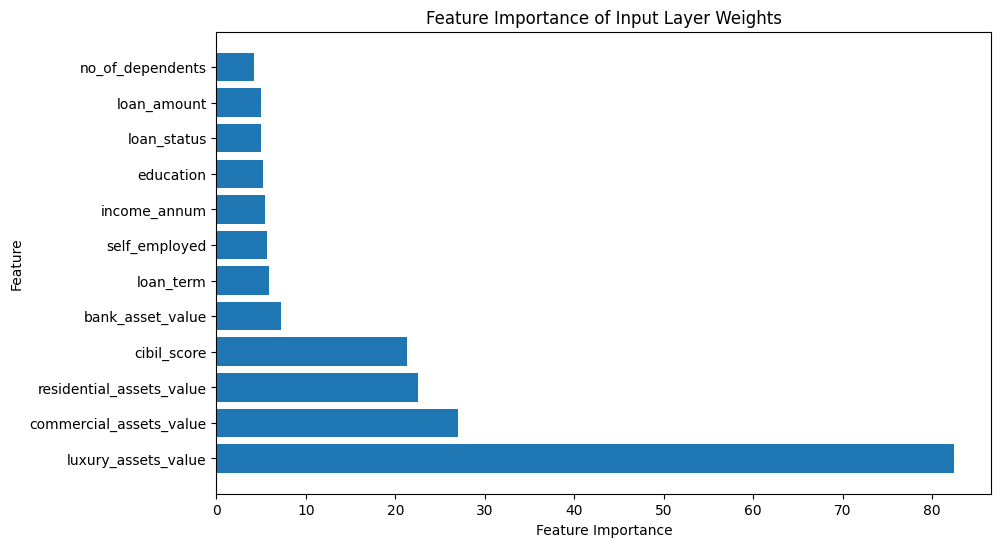

In [ ]:
feature_names = loan_dummies.columns

# Getting the coefficients (weights) of the input layer
input_layer_weights = best_ann_model.coefs_[0]

# Calculating the absolute sum of weights for each feature in the input layer
feature_importance = np.abs(input_layer_weights).sum(axis=1)

# Creating a dictionary mapping feature names to their importance scores
feature_importance_dict = dict(zip(feature_names, feature_importance))

# Sorting the feature importance dictionary by value in descending order
sorted_feature_importance = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)

# Printing the sorted feature importance
for feature, importance in sorted_feature_importance:
    print(f"Feature: {feature}, Importance: {importance}")

# ploting the feature importance
plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_feature_importance)), [val[1] for val in sorted_feature_importance], align='center')
plt.yticks(range(len(sorted_feature_importance)), [val[0] for val in sorted_feature_importance])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance of Input Layer Weights')
plt.show()

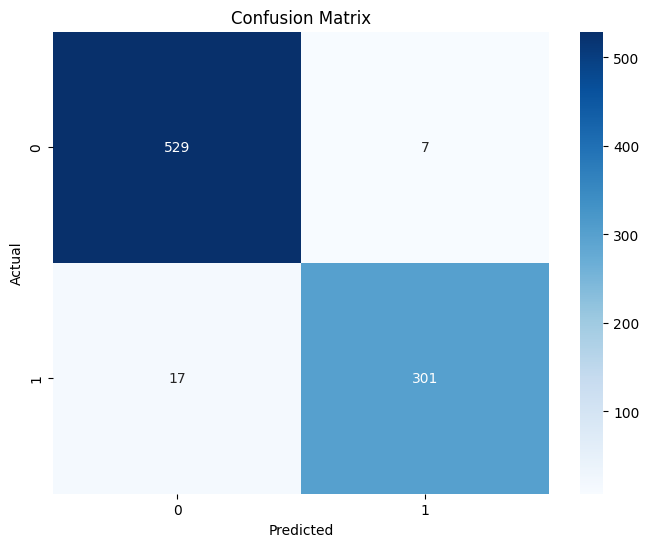


Tuned ANN Performance Metrics:
Accuracy: 0.9719
Precision: 0.9773
Recall: 0.9465
F1 Score: 0.9617
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98       536
           1       0.98      0.95      0.96       318

    accuracy                           0.97       854
   macro avg       0.97      0.97      0.97       854
weighted avg       0.97      0.97      0.97       854



In [ ]:
# Using the best model for predictions
best_ann_model = grid_search_ann.best_estimator_
y_pred_ann_tuned = best_ann_model.predict(X_test)

# Generating a classification report
classification_rep = classification_report(y_test, y_pred_ann_tuned)

# Generating a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_ann_tuned)

# Ploting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Evaluating the tuned model
accuracy_ann_tuned = accuracy_score(y_test, y_pred_ann_tuned)
precision_ann_tuned = precision_score(y_test, y_pred_ann_tuned)
recall_ann_tuned = recall_score(y_test, y_pred_ann_tuned)
f1_ann_tuned = f1_score(y_test, y_pred_ann_tuned)

print("\nTuned ANN Performance Metrics:")
print(f"Accuracy: {accuracy_ann_tuned:.4f}")
print(f"Precision: {precision_ann_tuned:.4f}")
print(f"Recall: {recall_ann_tuned:.4f}")
print(f"F1 Score: {f1_ann_tuned:.4f}")

# Printing the classification report
print("Classification Report:\n", classification_rep)

### Training with SVM

In [ ]:
from sklearn.svm import SVC

# Initializing and train the SVM model
svm_model = SVC(random_state=42)
svm_model.fit(X_train, y_train)

SVC(random_state=42)

In [ ]:
# Predictions on the test set
y_pred_svm = svm_model.predict(X_test)

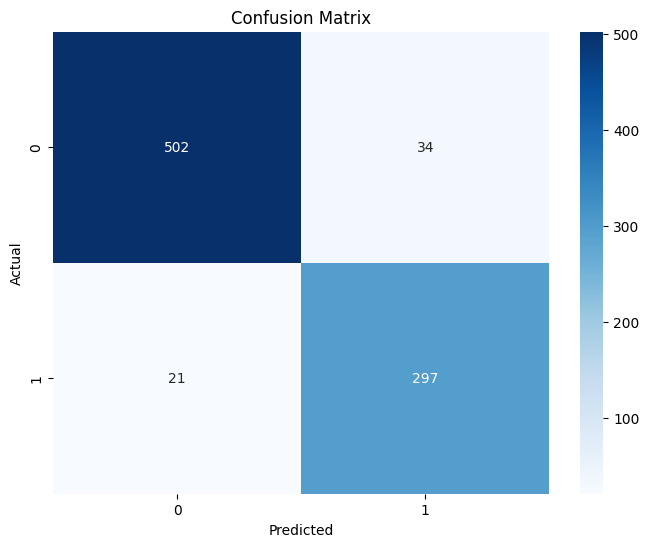


Support Vector classification (SVC) Performance Metrics:
Accuracy: 0.9356
Precision: 0.8973
Recall: 0.9340
F1 Score: 0.9153
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.94      0.95       536
           1       0.90      0.93      0.92       318

    accuracy                           0.94       854
   macro avg       0.93      0.94      0.93       854
weighted avg       0.94      0.94      0.94       854



In [ ]:
# Evaluating the model
accuracy_svm = accuracy_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm)
recall_svm = recall_score(y_test, y_pred_svm)
f1_svm = f1_score(y_test, y_pred_svm)

# Generating a classification report
classification_rep = classification_report(y_test, y_pred_svm)

# Generating a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_svm)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

print("\nSupport Vector classification (SVC) Performance Metrics:")
print(f"Accuracy: {accuracy_svm:.4f}")
print(f"Precision: {precision_svm:.4f}")
print(f"Recall: {recall_svm:.4f}")
print(f"F1 Score: {f1_svm:.4f}")

# Printing the classification report
print("Classification Report:\n", classification_rep)

### HyperParameter Tuning for SVM

Best Hyperparameters for SVM: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}


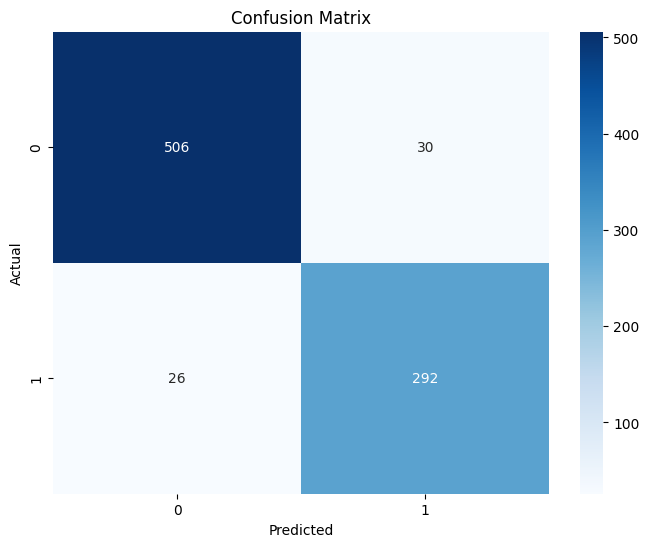


Tuned Support Vector classification (SVC) Performance Metrics:
Accuracy: 0.9344
Precision: 0.9068
Recall: 0.9182
F1 Score: 0.9125
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.94      0.95       536
           1       0.91      0.92      0.91       318

    accuracy                           0.93       854
   macro avg       0.93      0.93      0.93       854
weighted avg       0.93      0.93      0.93       854



In [ ]:
from sklearn.model_selection import GridSearchCV

# Defining the parameter grid for SVM
param_grid_svm = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto'],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
}

# Initializing SVM model
svm_model = SVC()

# Performing grid search
grid_search_svm = GridSearchCV(estimator=svm_model, param_grid=param_grid_svm, scoring='accuracy', cv=3)
grid_search_svm.fit(X_train, y_train)

# Printing the best hyperparameters
best_params_svm = grid_search_svm.best_params_
print(f"Best Hyperparameters for SVM: {best_params_svm}")

# Using the best model for predictions
best_svm_model = grid_search_svm.best_estimator_
y_pred_svm_tuned = best_svm_model.predict(X_test)

# Generating a classification report
classification_rep_svm = classification_report(y_test, y_pred_svm_tuned)

# Generating a confusion matrix
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm_tuned)

# Ploting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_svm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Evaluating the tuned SVM model
accuracy_svm_tuned = accuracy_score(y_test, y_pred_svm_tuned)
precision_svm_tuned = precision_score(y_test, y_pred_svm_tuned)
recall_svm_tuned = recall_score(y_test, y_pred_svm_tuned)
f1_svm_tuned = f1_score(y_test, y_pred_svm_tuned)

print("\nTuned Support Vector classification (SVC) Performance Metrics:")
print(f"Accuracy: {accuracy_svm_tuned:.4f}")
print(f"Precision: {precision_svm_tuned:.4f}")
print(f"Recall: {recall_svm_tuned:.4f}")
print(f"F1 Score: {f1_svm_tuned:.4f}")

# ing the classification report
print("Classification Report:\n", classification_rep_svm)

### Ploting Learning Curves for tuned SVM

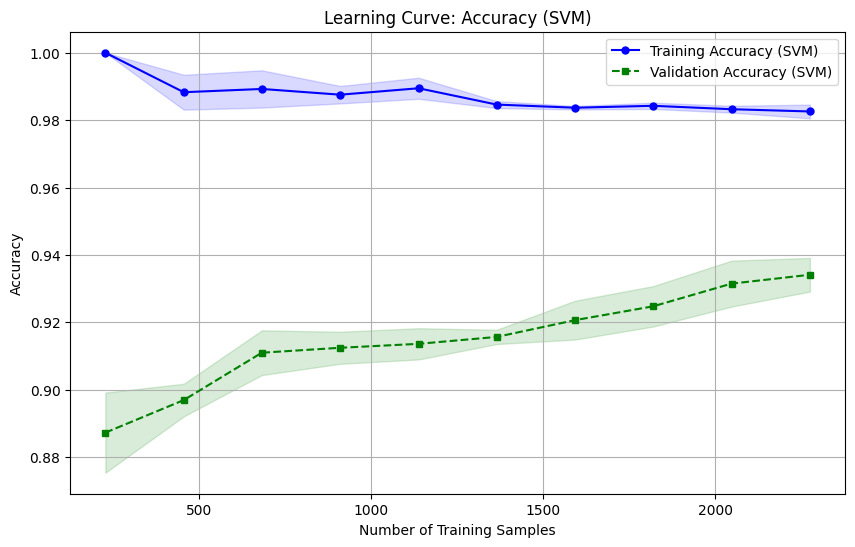

In [ ]:
from sklearn.model_selection import learning_curve

# Setting the parameters for learning curve
train_sizes_svm, train_scores_svm, test_scores_svm = learning_curve(
    estimator=best_svm_model,
    X=X_train,
    y=y_train,
    train_sizes=np.linspace(0.1, 1.0, 10),
    cv=3,
    scoring='accuracy',
    n_jobs=-1
)

# Calculating mean and standard deviation for training and test scores
train_mean_svm = np.mean(train_scores_svm, axis=1)
train_std_svm = np.std(train_scores_svm, axis=1)
test_mean_svm = np.mean(test_scores_svm, axis=1)
test_std_svm = np.std(test_scores_svm, axis=1)

# Plotting the learning curve for accuracy
plt.figure(figsize=(10, 6))
plt.plot(train_sizes_svm, train_mean_svm, color='blue', marker='o', markersize=5, label='Training Accuracy (SVM)')
plt.fill_between(train_sizes_svm, train_mean_svm + train_std_svm, train_mean_svm - train_std_svm, alpha=0.15, color='blue')
plt.plot(train_sizes_svm, test_mean_svm, color='green', linestyle='--', marker='s', markersize=5, label='Validation Accuracy (SVM)')
plt.fill_between(train_sizes_svm, test_mean_svm + test_std_svm, test_mean_svm - test_std_svm, alpha=0.15, color='green')
plt.xlabel('Number of Training Samples')
plt.ylabel('Accuracy')
plt.title('Learning Curve: Accuracy (SVM)')
plt.legend()
plt.grid()
plt.show()


### Comparing SVM with ANN

In [ ]:
# Metrics for Support Vector Machine (SVM)
accuracy_svm = accuracy_svm_tuned
f1_svm = f1_svm_tuned
precision_svm = precision_svm_tuned
recall_svm = recall_svm_tuned

# Metrics for Neural Network (ANN)
accuracy_ann = accuracy_ann_tuned
f1_ann = f1_ann_tuned
precision_ann = precision_ann_tuned
recall_ann = recall_ann_tuned


# Plotting the comparison
labels = ['Accuracy', 'F1 Score', 'Precision', 'Recall']
svm_metrics = [accuracy_svm, f1_svm, precision_svm, recall_svm]
ann_metrics = [accuracy_ann, f1_ann,precision_ann, recall_ann]

x = range(len(labels))

plt.bar(x, svm_metrics, width=0.4, label='Support Vector Machine (SVM)', align='center')
plt.bar(x, ann_metrics, width=0.4, label='Backpropagation Neural Network (BPNN)', align='edge')

plt.xlabel('Metrics')
plt.ylabel('Score')
plt.title('Performance Comparison: SVM vs. BPNN')

plt.legend(loc='lower right')

plt.xticks(x, labels)
plt.show()


**End**